Starry Tutorial by Rodrigo Luger, comments edited by Carlos E. Cruz-Arce

In [1]:
#First we import starry and turn off lazy mode
import starry

starry.config.lazy = False




map = starry.Map(ydeg=5) #Map object takes a few arguments, the most important of which is ydeg, the highest degree of the spherical harmonics used to describe the map.

Pre-computing some matrices... Done.


Compiling `render`... Done.


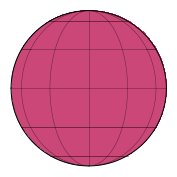

In [2]:
#The y attribute of the map stores the spherical harmonic coefficients.
map.y       #This is Y_0,0, by defualt all other coefficients are set to zero
map.show()

In [3]:
#Lets compute the intensity at any point on the surface (Latitude & Longitude)
map.intensity(lat=0,lon=0) #the intensity at point (0,0), B/C our map is constant this is also the intensity everywhere on the surface

Compiling `intensity`... Done.


array([0.31830989])

In [4]:
#the average disk-integrated intensity is equal to the coefficient of the constant Y_0,0 harmonic, which is fixed at 1
##So the total flux (intensity integrated over area) of the map should be 1
import numpy as np

np.pi * 1.0 ** 2 * map.intensity(lat=0, lon=0) #intensity of a sphere at (0,0 )

map.flux() #Flux visible to observer

Compiling `flux`... Done.


array([1.])

Setting map coefficients

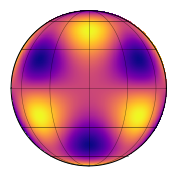

In [5]:
#Lets say we want to set the coefficients to Y_5,-3 to -2
map[5,-3] = -2
map.show()

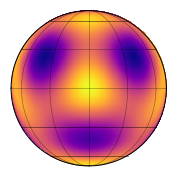

In [6]:
#Playing around some more with coefficients
map[5, 0] = 2
map[5, 4] = 1
map.show()

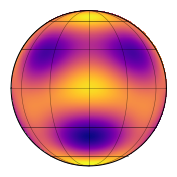

In [7]:
#Playing around some more with coefficients
map[5, 2] = 1.5
map.show()

In [8]:
#Making movies
theta = np.linspace(0, 360, 50)  #by defualt this is in degrees, you can change this with 'map.angle_unit()'
map.show(theta=theta)            #you can animate by passing a vector theta argument to show()

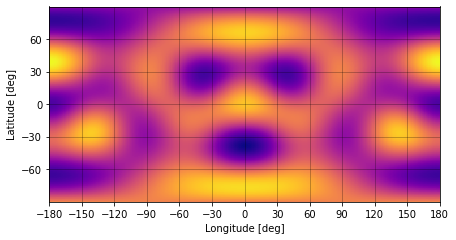

In [9]:
#Seeing the full map in 2D
map.show(projection="rect")  #(latitude-longitude) global view

Loading Map Images

In [10]:
import os
import glob
#This loads in images from Healpix
for file in glob.glob(os.path.join(os.path.dirname(starry.__file__), "img", "*.jpg")):
    print(os.path.basename(file)[:-4])

spot
jupiter
earth
moon


Pre-computing some matrices... Done.
Compiling `render`... Done.


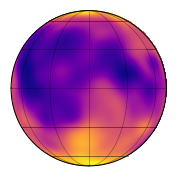

In [28]:
#We can pick one to load in, let's say Earth
map = starry.Map(ydeg=30)       #Setting the highest degree. You can think of this as 'how resolved do i want this image to be' 
map.load("moon", sigma=0.08)   #'map.load()' can also load in image files and numpy arrays on a rectangular latitude/longitude grid
map.show()

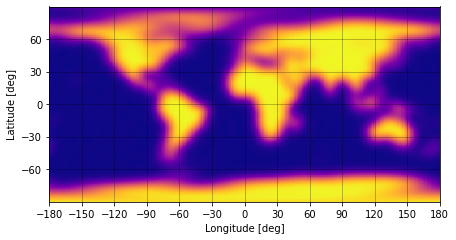

In [12]:
#Checking out the equirectangular (latitude-longitude) global view
map.show(projection="rect")


Changing the orientation

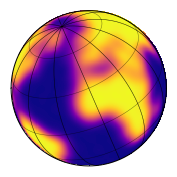

In [13]:
#We can change the orientation of the map by specifying its inclination inc and obliquity obl.
map.obl = 23.5   #The obliquity is measured as the rotation angle of the objecet on the sky plane, measured counter-clockwise from north.
map.inc = 60.0   #The inclination is measured as the rotation of the object away from the line of sight.
map.show()       #inclination and obliquity of the Earth relative to the observer

Computing the intensity

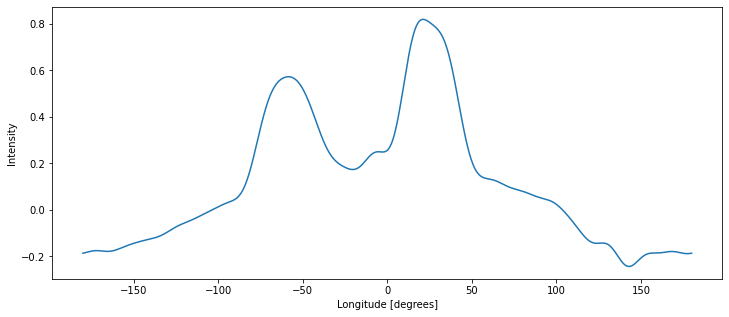

In [26]:
#Plotting Intensity V Longitude
##This method takes the latitude and longitude of a point or a set of points on the surface and returns the specific intensity at each one.
import matplotlib.pyplot as plt
lon = np.linspace(-180, 180, 1000) #Define Longitude
I = map.intensity(lat=0, lon=lon)  #Define Intensity using 'map.intensity()' againt
fig = plt.figure(figsize=(12, 5))
plt.plot(lon, I)
plt.xlabel("Longitude [degrees]")
plt.ylabel("Intensity");

Computing the flux: phase curves

Compiling `flux`... Done.


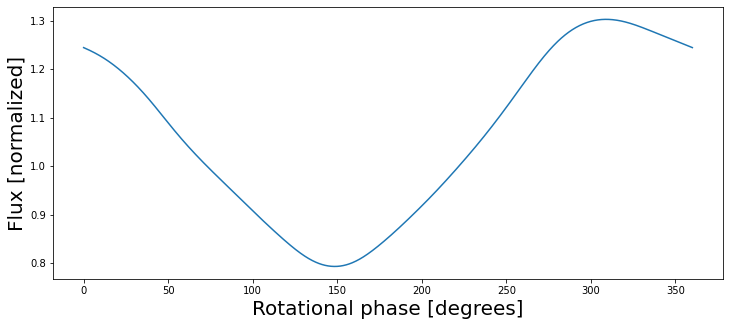

In [15]:
#Let's make a phase curve
##In a phase curve the observed flux is simply the integral over the entire disk when the object is viewed at a particular phase.
theta = np.linspace(0, 360, 1000)      #Defines theta that will later be used to specify phase via the 'theta' keyword
plt.figure(figsize=(12, 5))
plt.plot(theta, map.flux(theta=theta)) #'map.flux()' computes flux given a phase (theta)
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

In [16]:
map.show(theta=np.linspace(0, 360, 50)) 

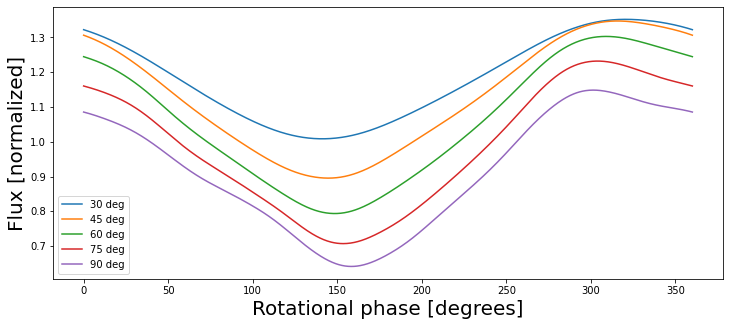

In [17]:
plt.figure(figsize=(12, 5))
#We'll plot with multiple values of inclination to really show the differences
for inc in [30, 45, 60, 75, 90]:
    map.inc = inc
    plt.plot(theta, map.flux(theta=theta), label="%2d deg" % inc)
plt.legend(fontsize=10)
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

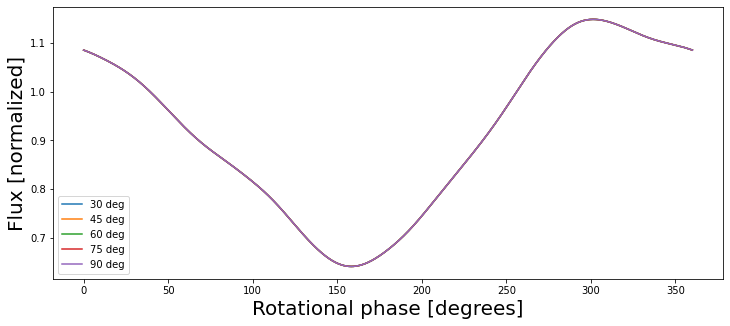

In [18]:
#Interestingly enough changing the obliquity does not change the phase curve
plt.figure(figsize=(12, 5))
#We'll plot for multiple values of obliquity
for obl in [30, 45, 60, 75, 90]:
    map.obl = obl
    plt.plot(theta, map.flux(theta=theta), label="%2d deg" % obl)
plt.legend(fontsize=10)
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

Computing the flux: transits and occultations

Pre-computing some matrices... Done.
Compiling `flux`... Done.


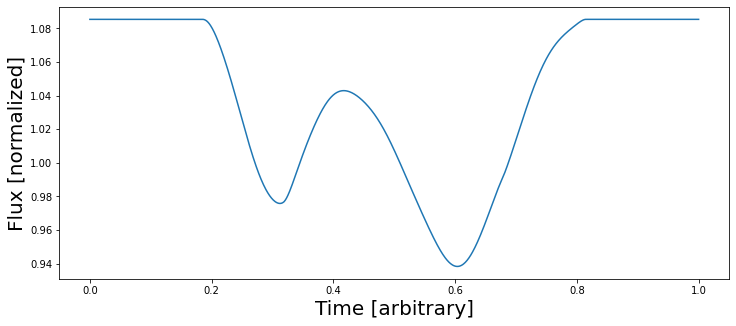

In [19]:
#Constructing a light curve of the moon occulting the Earth 
# Set the occultor(moon) trajectory
npts = 1000                        #Number of points
time = np.linspace(0, 1, npts)     #this is arbitrary
##Cartesian position of the occultor (xo, yo, zo)
xo = np.linspace(-2.0, 2.0, npts)  #Units of the occulted body's radius (Earth radii)
yo = np.linspace(-0.3, 0.3, npts)  #Units of the occulted body's radius (Earth radii)
zo = 1.0                           #Units of the occulted body's radius (Earth radii)
ro = 0.272                         #Units of the occulted body's radius (Earth radii)

# Load the map of the Earth
map = starry.Map(ydeg=20)
map.load("earth", sigma=0.08)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)  #Define moon's flux via its position
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

Compiling `render`... Done.


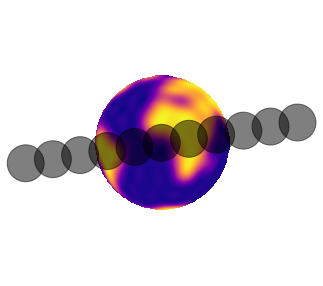

In [20]:
#Just for context, this is the trajectory of the occultor (moon)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

Computing the flux: limb-darkening

Compiling `render_ld`... Done.


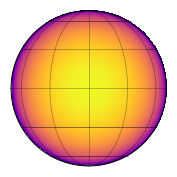

In [21]:
#Quadratic Limb Darkening
map = starry.Map(udeg=2) #To enable limb darkening, set the udeg parameter to the degree of the limb darkening model when instantiating a map.
##Setting limb darkening coefficients
map[1] = 0.5             #This sets the linear limb darkening coefficient to be u_1 = 0.5 
map[2] = 0.25            #This sets the quadratic limb darkening coefficient to be u_2 = 0.25
map.show()

Compiling `flux`... Done.


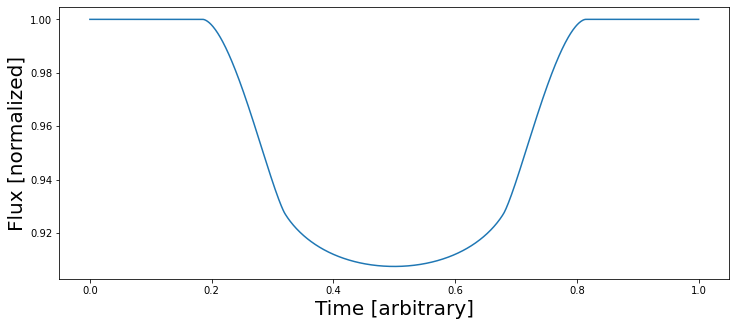

In [22]:
# Set the occultor trajectory (Say the moon transiting across the face of the Earth)
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.272

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
plt.plot(time, map.flux(xo=xo, yo=yo, ro=ro, zo=zo)) 
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);

Pre-computing some matrices... Done.
Compiling `render`... Done.


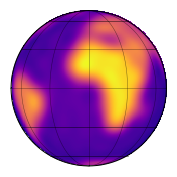

In [23]:
#Let's look at the limb darkening of the Earth
map = starry.Map(ydeg=20, udeg=2)  #Load in the Earth with both spherical harmonics(ydeg) and limb darkening (udeg)
map.load("earth", sigma=0.08)
map[1] = 0.5                       #This sets the linear limb darkening coefficient to be u_1 = 0.5 
map[2] = 0.25                      ##This sets the quadratic limb darkening coefficient to be u_2 = 0.25
map.show()

Compiling `flux`... Done.


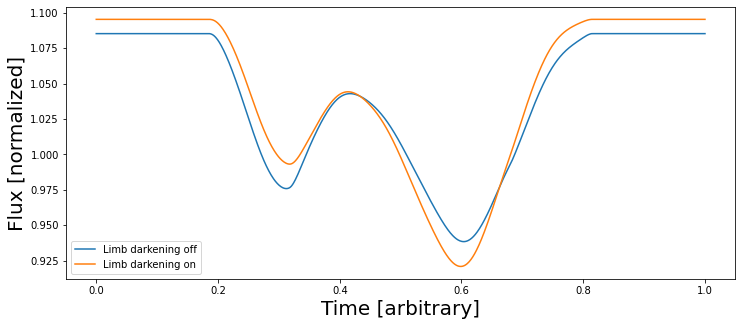

In [24]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.272

# Set the map inclination and obliquity
map.inc = 90
map.obl = 0

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
plt.plot(time, flux_moon, label="Limb darkening off")
plt.plot(time, map.flux(xo=xo, yo=yo, ro=ro, zo=zo), label="Limb darkening on")
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)
plt.legend();